In [102]:
from datetime import datetime,date,time
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv("四川台区日负荷.csv")
df.序列 = df.序列.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [104]:
#TIMESTEPS = 672


In [105]:
df["date"]=df.序列.apply(lambda x: x.date())

In [106]:
df["time"]=df.序列.apply(lambda x: x.time())

In [107]:
df_reshaped=df.pivot("date","time","值")
df_reshaped = df_reshaped.dropna()

In [108]:
tr=df_reshaped[df_reshaped.index<date(2017,12,15)]
te=df_reshaped[df_reshaped.index>=date(2017,12,15)]

In [109]:
Mean= tr.mean()
Std = tr.std()

In [110]:
train = (tr-Mean)/Std; test = (te-Mean)/Std

In [111]:
TIMESTEPS = 7
STEP =1

serieses=[]
nextday=[]
serieses_te=[]
nextday_te=[]

for i in range(0,len(train)-TIMESTEPS,STEP):
    serieses.append(np.array(train.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(train.iloc[i + TIMESTEPS])) 

for i in range(0,len(test)-TIMESTEPS,STEP):
    serieses_te.append(np.array(test.iloc[i: i + TIMESTEPS]))
    nextday_te.append(np.array(test.iloc[i + TIMESTEPS]))     

In [112]:
x_train=np.array(serieses);y_train=np.array(nextday)
x_test=np.array(serieses_te);y_test=np.array(nextday_te)

In [113]:
model = Sequential()

model.add(Dense(7, input_dim=7, activation='tanh',init="normal"))
model.add(Dropout(0.5))
model.add(Dense(7, activation='tanh',init="normal"))
model.add(Dropout(0.5))
model.add(Dense(1,init="normal"))


#model.add(LSTM(50, input_shape=(TIMESTEPS, len(train.columns)),init="normal"))
#model.add(Dense(len(train.columns),init="normal"))


/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="tanh", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="tanh", kernel_initializer="normal")`
  """
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  import sys


In [114]:
#model.compile(loss='mae', optimizer='adam')

In [115]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.3))

In [118]:
model.fit(x_train[:,:,0], y_train[:,0], epochs=30,batch_size=10,
          verbose=2,validation_split=0.2) 

Train on 98 samples, validate on 25 samples
Epoch 1/30
 - 0s - loss: 0.6704 - val_loss: 0.5047
Epoch 2/30
 - 0s - loss: 0.7993 - val_loss: 0.4697
Epoch 3/30
 - 0s - loss: 0.7876 - val_loss: 0.4361
Epoch 4/30
 - 0s - loss: 0.6539 - val_loss: 0.5622
Epoch 5/30
 - 0s - loss: 0.8884 - val_loss: 0.3730
Epoch 6/30
 - 0s - loss: 0.8165 - val_loss: 0.4437
Epoch 7/30
 - 0s - loss: 0.8088 - val_loss: 0.4246
Epoch 8/30
 - 0s - loss: 0.8475 - val_loss: 0.5285
Epoch 9/30
 - 0s - loss: 0.8578 - val_loss: 0.3786
Epoch 10/30
 - 0s - loss: 0.6923 - val_loss: 0.3909
Epoch 11/30
 - 0s - loss: 0.6371 - val_loss: 0.3882
Epoch 12/30
 - 0s - loss: 0.7685 - val_loss: 0.3760
Epoch 13/30
 - 0s - loss: 0.7747 - val_loss: 0.4989
Epoch 14/30
 - 0s - loss: 0.6944 - val_loss: 0.5466
Epoch 15/30
 - 0s - loss: 0.7862 - val_loss: 0.4832
Epoch 16/30
 - 0s - loss: 0.9170 - val_loss: 0.4176
Epoch 17/30
 - 0s - loss: 0.7349 - val_loss: 0.3542
Epoch 18/30
 - 0s - loss: 0.7902 - val_loss: 0.3612
Epoch 19/30
 - 0s - loss: 0.5

In [119]:
model.predict(x_test[:,:,0])

array([[-0.4446915 ],
       [-0.24418712],
       [-0.07524988],
       [-0.26933306],
       [ 0.0317813 ],
       [-0.31987017],
       [ 0.19686534],
       [-0.27793163],
       [-0.19522712],
       [-0.03040293]], dtype=float32)

In [120]:
y_test[:,0]

array([ 0.84484948, -0.87819015, -0.34393247, -0.80352489,  0.2535747 ,
       -0.55867222, -0.80876997,  0.75617677, -0.78778965, -0.88115207])

In [55]:
y_train[:,0].shape

(123,)

In [11]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

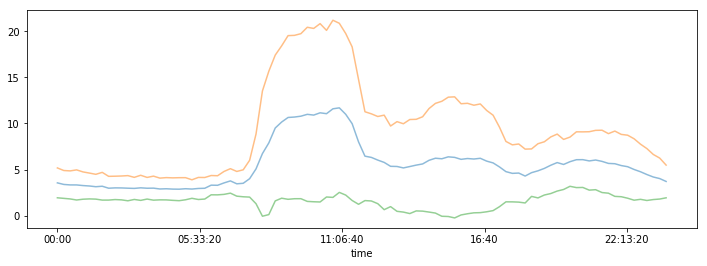

In [13]:
M.plot(alpha =0.5,figsize = (12,4))
(M+Std).plot(alpha =0.5,figsize = (12,4))
(M-Std).plot(alpha =0.5,figsize = (12,4))

In [39]:
df_reshaped.index[-140:]

Index([2017-08-10, 2017-08-11, 2017-08-12, 2017-08-13, 2017-08-14, 2017-08-15,
       2017-08-16, 2017-08-17, 2017-08-18, 2017-08-19,
       ...
       2017-12-22, 2017-12-23, 2017-12-24, 2017-12-25, 2017-12-26, 2017-12-27,
       2017-12-28, 2017-12-29, 2017-12-30, 2017-12-31],
      dtype='object', name='date', length=140)

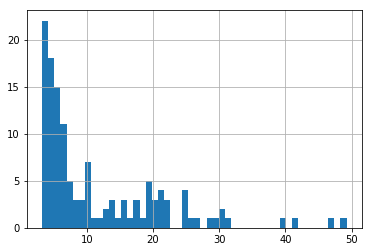

In [13]:
tr[time(10,45,0)].hist(bins=50)

In [12]:
TIMESTEPS = 7
STEP =1

serieses=[]
nextday=[]

for i in range(0,len(df_reshaped)-TIMESTEPS,STEP):
    serieses.append(np.array(df_reshaped.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(df_reshaped.iloc[i + TIMESTEPS]))    

In [8]:
S = np.array(serieses)

In [9]:
S.shape

(140, 7, 96)

In [21]:
S_mean=S.mean(axis=1);S_std=S.std(axis=1)

In [41]:
df_mean= pd.DataFrame(S_mean, columns = tr.columns, index=df_reshaped.index[-140:])
df_std= pd.DataFrame(S_std, columns = tr.columns,index=df_reshaped.index[-140:])

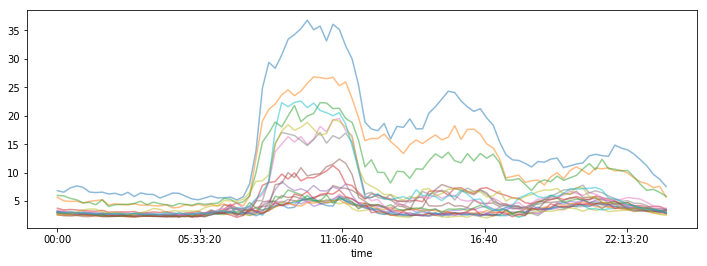

In [48]:
for i in range(0,len(df_mean),7):
    df_mean.iloc[i].plot(alpha =0.5,figsize = (12,4))
#    (df_mean.iloc[i]+df_std.iloc[i]).plot(alpha =0.5,figsize = (12,4))
#    (df_mean.iloc[i]-df_std.iloc[i]).plot(alpha =0.5,figsize = (12,4))

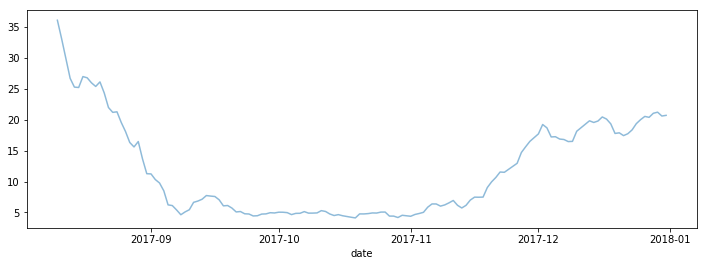

In [42]:
df_mean[time(10,45,0)].plot(alpha =0.5,figsize = (12,4))

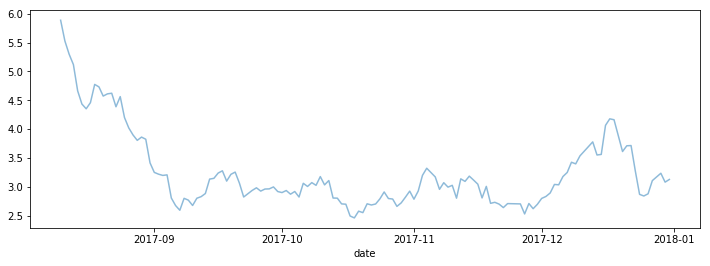

In [43]:
df_mean[time(6,0,0)].plot(alpha =0.5,figsize = (12,4))

In [10]:
len(df_reshaped)

147